# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

In [9]:
model1 = kmeans.fit(X,y)

In [13]:
print(model1.score(X,y))

-323211.55263465445


In [18]:
from sklearn.metrics import silhouette_score

In [19]:
model1.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, model1.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.540


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [20]:
kmeans = KMeans(n_clusters=5)
model2 = kmeans.fit(X,y)
model2.fit_predict(X)
score = silhouette_score(X, model2.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.549


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [30]:
kmeans = KMeans(n_clusters=3)
model3 = kmeans.fit(X,y)
model3.fit_predict(X)
score = silhouette_score(X, model3.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.571


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



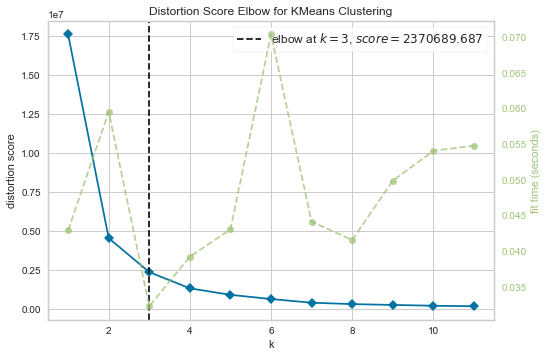

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [28]:
from sklearn.cluster import AgglomerativeClustering


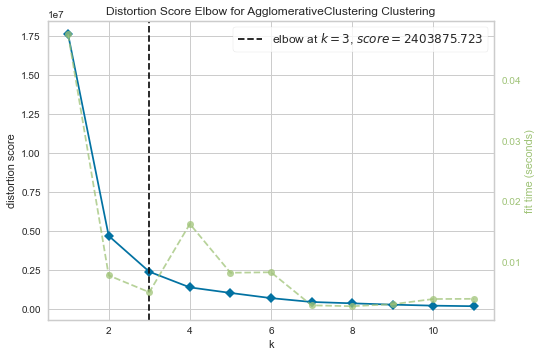

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [46]:
model = AgglomerativeClustering(n_clusters=3)

In [47]:
model.fit(X,y)

AgglomerativeClustering(n_clusters=3)

In [49]:
y_pred = model.fit_predict(X)

In [50]:
X['target'] = y_pred

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

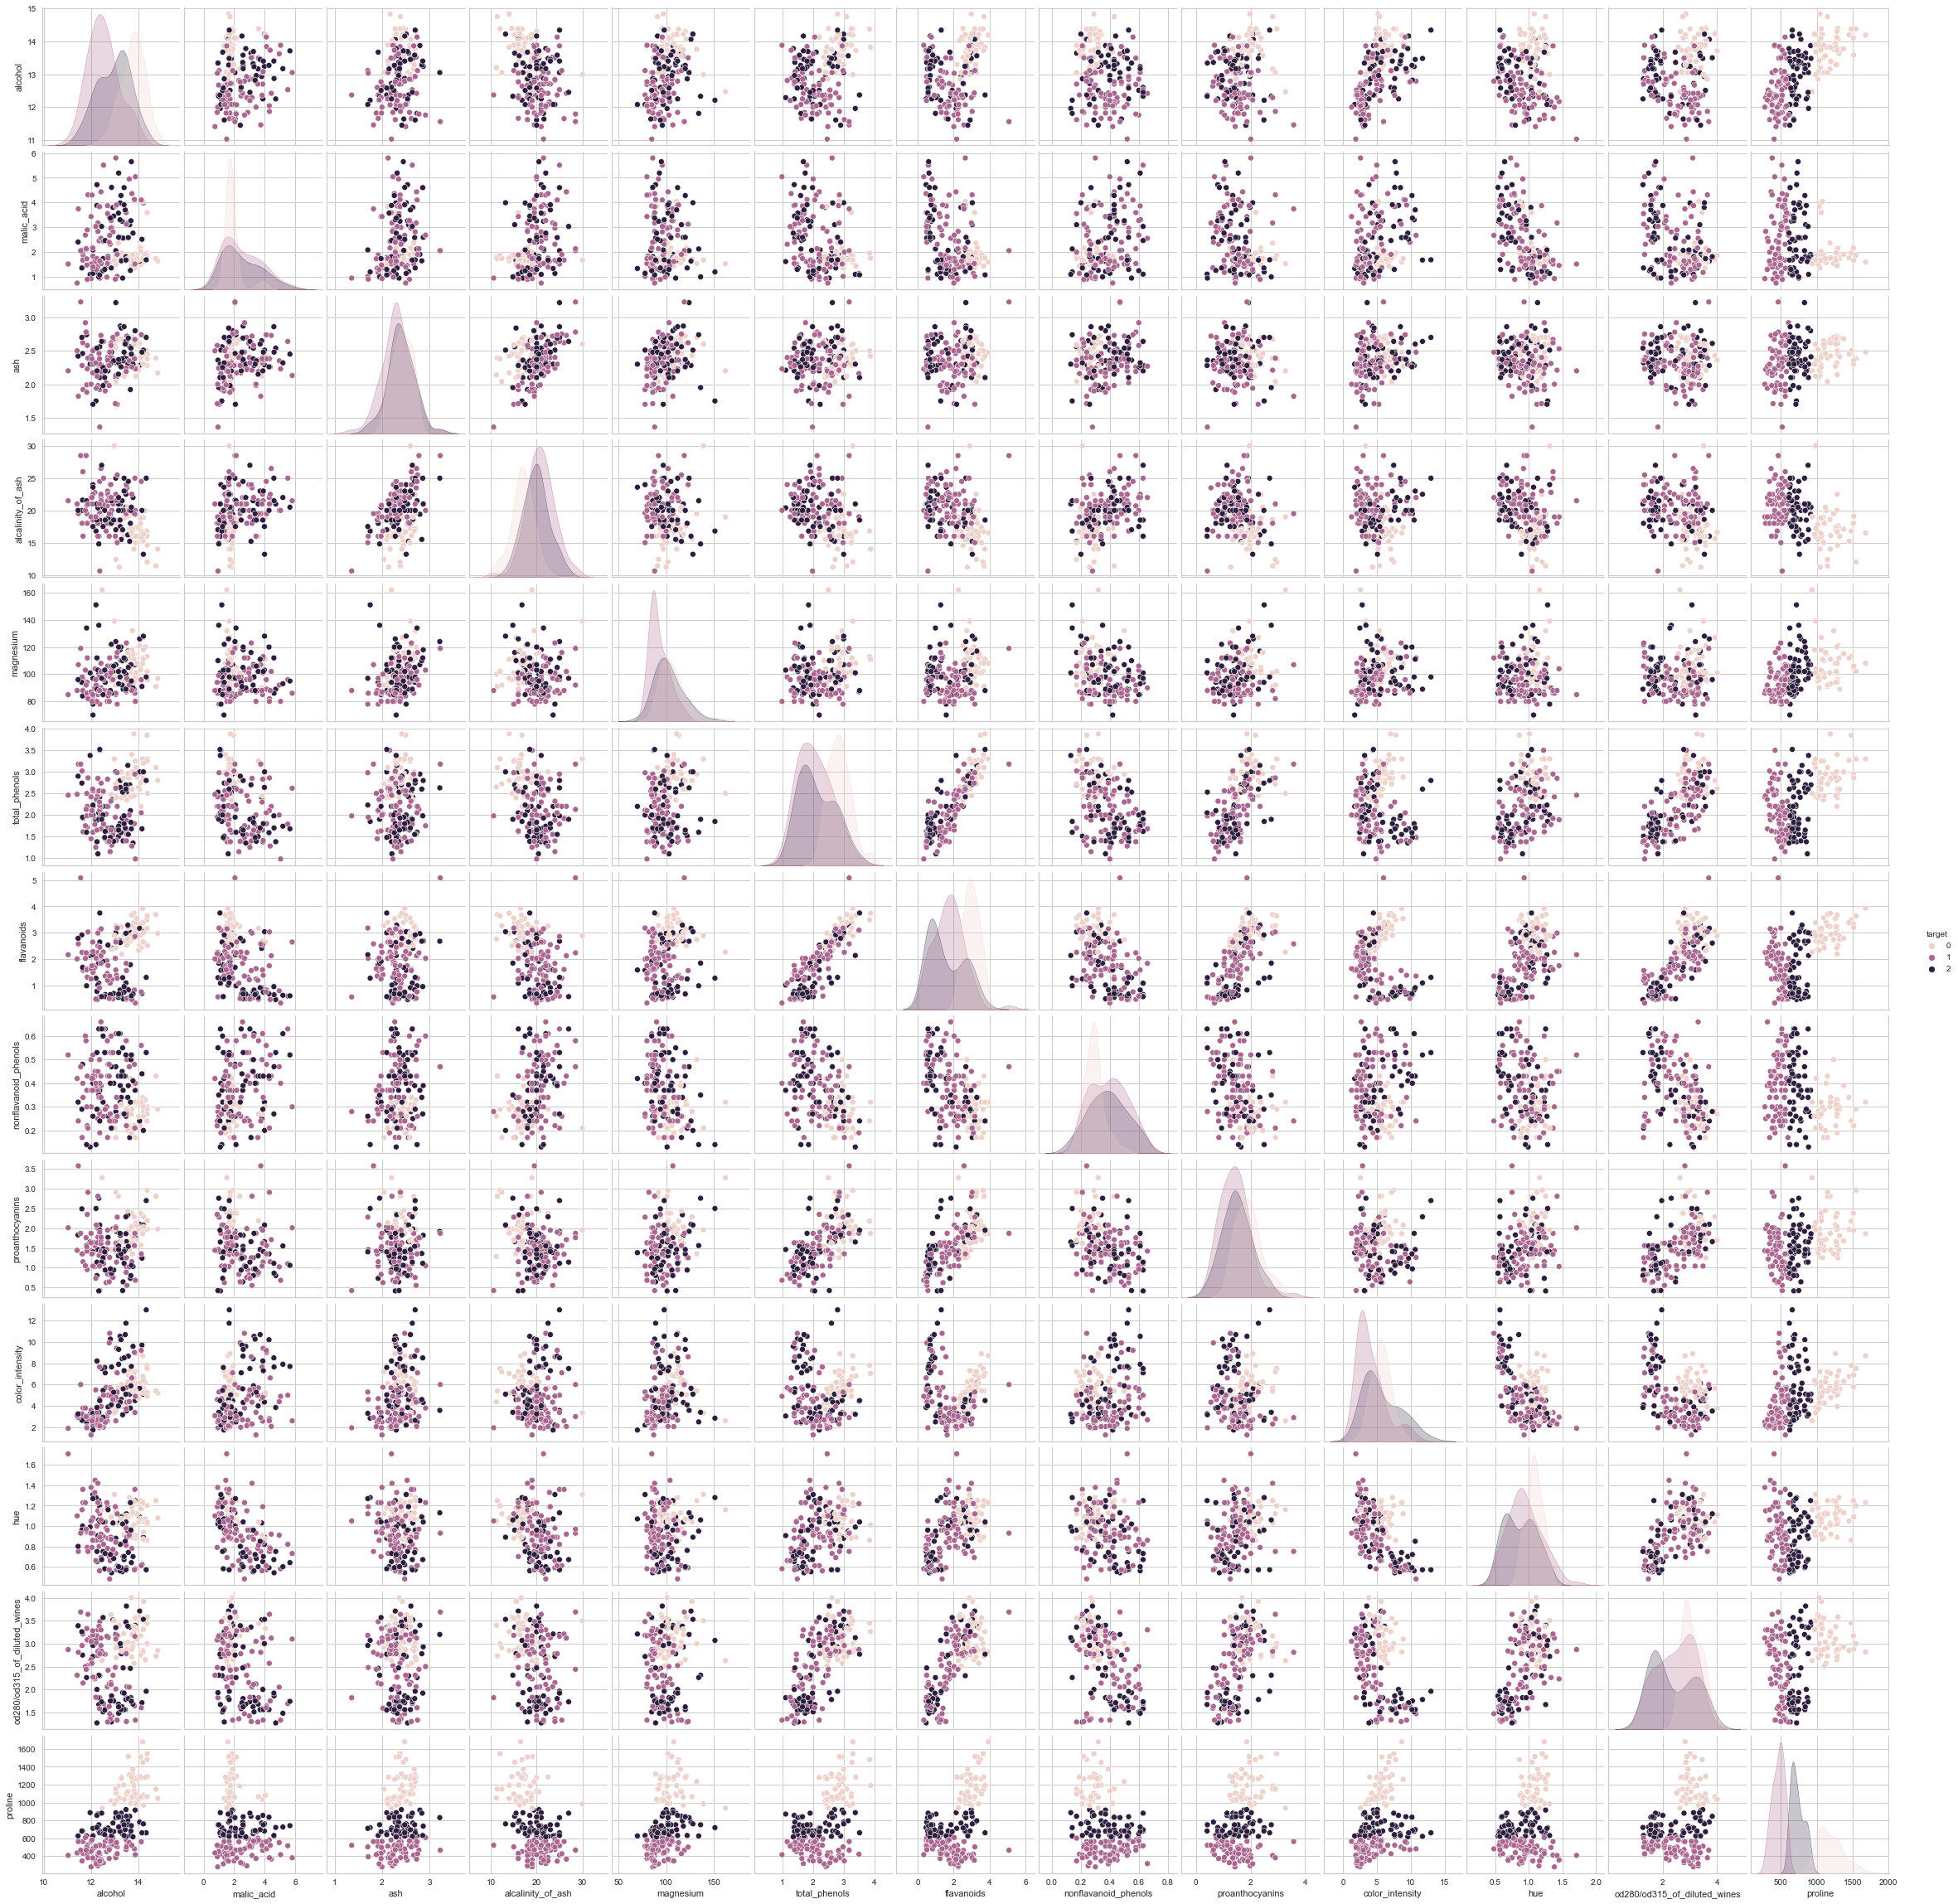

In [51]:
sns.pairplot(X, hue='target')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [52]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
scaler.fit(data["data"])

StandardScaler()

In [91]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [92]:
df_t = pd.Series(data["target"])

In [93]:
scaler.fit(df)

StandardScaler()

In [94]:
scaled_data = scaler.transform(df)

In [95]:
scaled_datadf = pd.DataFrame(scaled_data, columns=data['feature_names'] )

In [96]:
scaled_datadf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=2)

In [69]:
pca.fit(scaled_data)

PCA(n_components=2)

In [70]:
x_pca = pca.transform(scaled_data)

In [71]:
scaled_data.shape

(178, 13)

In [72]:
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

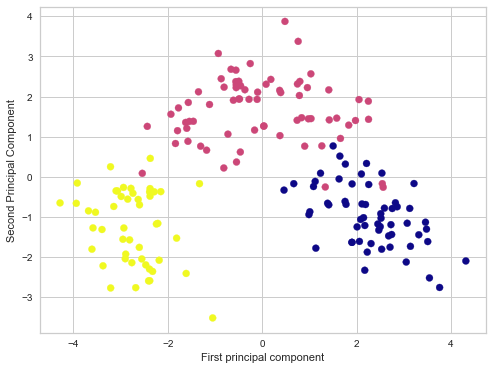

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_t,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [75]:
df_comp = pd.DataFrame(pca.components_,columns=data['feature_names'])

<AxesSubplot:>

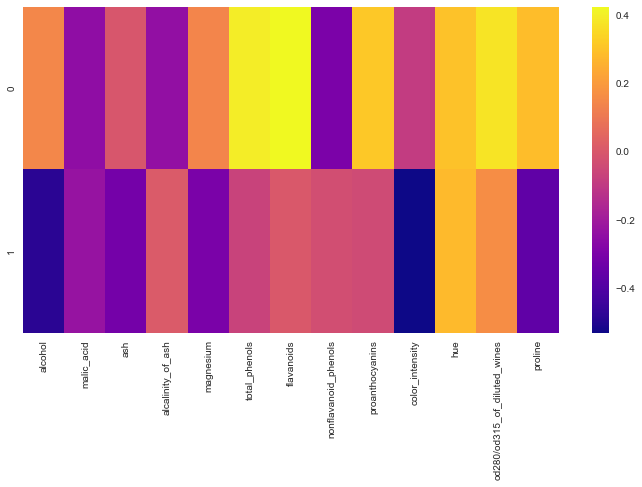

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [77]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(scaled_data)
X_embedded.shape

(178, 2)

In [85]:
tsne_model = TSNE(n_components=2)

In [80]:
target_ids = range(len(data.target_names))

from matplotlib import pyplot as plt


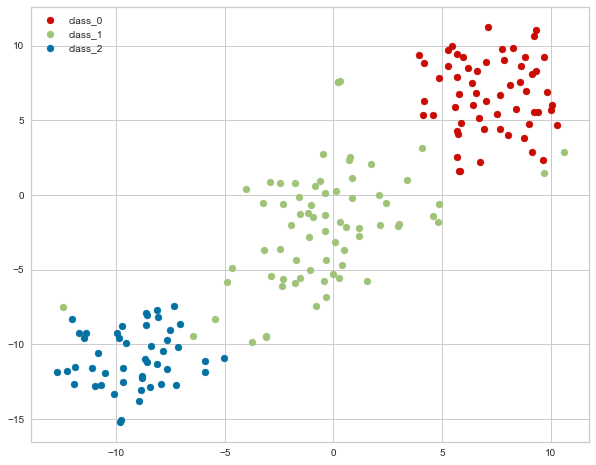

In [84]:
plt.figure(figsize=(10, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, data.target_names):
    plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=c, label=label)
plt.legend()
plt.show()